# 讀取套件

In [2]:
import pandas as pd
import numpy as np

# 繪圖相關套件
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.gridspec as gridspec
import seaborn as sns
plt.style.use( 'ggplot' ) 

# 設定套件參數

In [3]:
#設定pandas 的顯示上限
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

# 讓pd.describe() 限制為2個小數
# pd.options.display.float_format = "{:.2f}".format

# 函數定義區

In [4]:
# 定義判別欄位型態的函數
def Col_Types(Data):
    Column_Types = Data.dtypes.to_frame().reset_index() # 判別每個欄位的型態 
    Column_Types.columns = ['ColumnName', 'Type']
    Column_Types.sort_values(by='Type', inplace=True) 
    return Column_Types

# 定義用來統計欄位缺漏值總數的函數
def Missing_Counts(Data) : 
    missing = Data.isnull().sum() # 計算欄位中缺漏值的數量 
    missing = missing[missing>0]
    missing.sort_values(inplace=True) 
    
    Missing_Count = pd.DataFrame({'ColumnName': missing.index, 'MissingCount': missing.values}) # Convert Series to DataFrame
    Missing_Count['Percentage(%)'] = Missing_Count['MissingCount'].apply(lambda x:round(x/Data.shape[0]*100,2))
    return Missing_Count

# read data

In [5]:
df_train = pd.read_csv("Women's E-Commerce Clothing Reviews\Womens Clothing E-Commerce Reviews.csv")
# df_test = pd.read_csv("")

print(f'train {df_train.shape}')
display(df_train.head())

# print(f'\ntest {df_test.shape}')
# display(df_test.head())

train (23486, 11)


,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


# 描述資料型態

In [18]:
# 判別資料型態
display(Col_Types(df_train))

,ColumnName,Type
0,Unnamed: 0,int64
1,Clothing ID,int64
2,Age,int64
5,Rating,int64
6,Recommended IND,int64
7,Positive Feedback Count,int64
3,Title,object
4,Review Text,object
8,Division Name,object
9,Department Name,object


In [26]:
# 判別遺失值
print('train :')
display(Missing_Counts(df_train))

# print('test :')
# display(Missing_Counts(df_test))

train :


,ColumnName,MissingCount,Percentage(%)
0,Division Name,14,0.06
1,Department Name,14,0.06
2,Class Name,14,0.06
3,Review Text,845,3.60
4,Title,3810,16.22


In [23]:
# 描述資料
df_train.describe().round(2)

,Unnamed: 0,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.00,23486.00,23486.00,23486.00,23486.00,23486.00
mean,11742.50,918.12,43.20,4.20,0.82,2.54
std,6779.97,203.30,12.28,1.11,0.38,5.70
min,0.00,0.00,18.00,1.00,0.00,0.00
25%,5871.25,861.00,34.00,4.00,1.00,0.00
50%,11742.50,936.00,41.00,5.00,1.00,1.00
75%,17613.75,1078.00,52.00,5.00,1.00,3.00
max,23485.00,1205.00,99.00,5.00,1.00,122.00


# 連續型變數-pd.hist
DataFrame.hist(column=None, by=None, grid=True, xlabelsize=None, xrot=None, ylabelsize=None, yrot=None, ax=None, sharex=False, sharey=False, figsize=None, layout=None, bins=10, backend=None, legend=False, **kwargs)[source]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000BF95EB8>]],
      dtype=object)

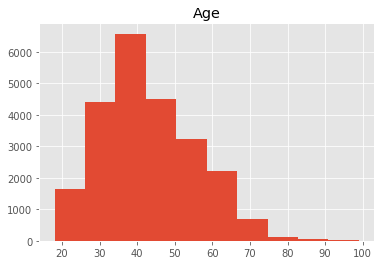

In [21]:
df_train.hist('Age')

# 連續型變數-pd.boxplot
DataFrame.boxplot(column=None, by=None, ax=None, fontsize=None, rot=0, grid=True, figsize=None, layout=None, return_type=None, backend=None, **kwargs)[source]

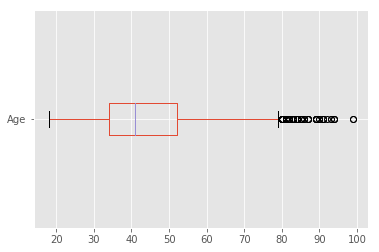

In [51]:
df_train.boxplot('Age',vert=False)


# pd.pivot 樞紐分析
pandas.pivot_table(data, values=None, index=None, columns=None, aggfunc='mean', fill_value=None, margins=False, dropna=True, margins_name='All', observed=False)
* data : 讀取你要使用的 DataFrame
* index : 必要參數。此處輸入不想要變動的數據，作為想要比較的欄位基礎，該數據會成為第一欄的索引（index），此處能以 list、array 等方式輸入多個 index，則結果會以巢狀的方式呈現。
* values : 可選。可以對需要計算的數據做篩選，如果以 list、array 等方式輸入多個 value，則能夠分別獲得該欄位的不同數值。
* columns : 可選。用以分割數據，去選出想比較的特定欄位。
* aggfunc : function 參數。是 Pivot Table 裡最厲害的功能，能夠引入 max、min 等內建參數，甚至能自訂 function 使用。

In [29]:
# 固定一個參數看其他的分布
display(df_train.pivot_table(index = 'Rating'))

,Age,Clothing ID,Positive Feedback Count,Recommended IND,Unnamed: 0
Rating,,,,,
1,43.693587,916.214964,3.459620,0.019002,11949.839667
2,42.622364,925.016613,3.325879,0.060064,11751.965495
3,42.158481,928.110414,3.145246,0.414141,11698.867294
4,42.887532,921.410282,2.405554,0.966910,11734.964349
5,43.583124,913.961389,2.299749,0.998096,11740.530196


In [35]:
#看每件商品的平均評價
display(df_train.pivot_table(index = 'Clothing ID',values = 'Rating', aggfunc = 'mean'))

,Rating
Clothing ID,
0,5.000000
1,4.000000
2,4.000000
3,5.000000
4,5.000000
5,5.000000
6,5.000000
7,5.000000
8,3.571429


In [38]:
#看每件商品的平均評價，可以找到評價不好的商品
aggr = df_train.pivot_table(index = 'Clothing ID',values = 'Rating', aggfunc = 'mean')
aggr.sort_values(by='Rating', inplace=True)
aggr

,Rating
Clothing ID,
432,1.000000
371,1.000000
1176,1.000000
369,1.000000
348,1.000000
669,1.000000
284,1.000000
273,1.000000
269,1.000000


# 類別型變數-樞紐分析


In [43]:
# 可寫成函式
#看每件商品的平均評價，可以找到評價不好的商品
division_cnt = df_train['Division Name'].value_counts().reset_index()
division_cnt.columns = ['Division Name', 'Counts']
division_cnt
# display(df_train.pivot_table(index = 'Division Name',values = 'index', aggfunc = 'count'))


,Division Name,Counts
0,General,13850
1,General Petite,8120
2,Initmates,1502


In [48]:
df_train.pivot_table(index = 'Division Name',values = 'Clothing ID', aggfunc = 'count')


,Clothing ID
Division Name,
General,13850
General Petite,8120
Initmates,1502


# 類別型變數-bar plot

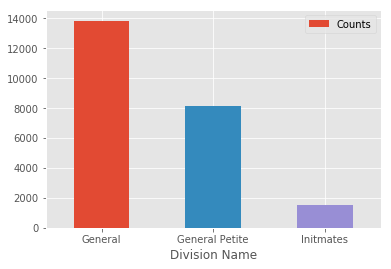

In [49]:
division_cnt.plot.bar(x='Division Name', y='Counts', rot=0)

# 類別型變數-pie plot

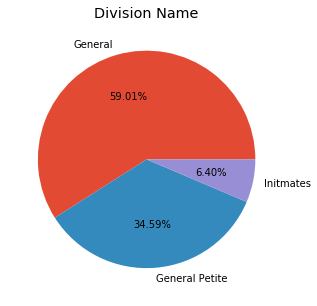

In [55]:
plt.figure(figsize=(10,5))
df_train['Division Name'].value_counts().plot(kind='pie', autopct='%1.2f%%' )
plt.title('Division Name') # 圖標題
plt.ylabel('')
plt.show()

# 相關性分析-折線圖

### 單一條線的畫法

In [63]:
#先做一個pivot table
rating_aggrby_age = df_train.pivot_table(index = 'Age', values = 'Rating',aggfunc = "mean")
rating_aggrby_age = rating_aggrby_age.reset_index()

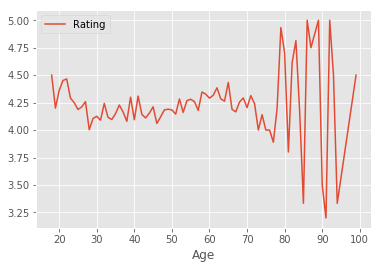

In [64]:
rating_aggrby_age.plot.line(x='Age', y='Rating')

### 多條線的畫法

In [67]:
#先做一個pivot table
rating_aggrby_age_byClass = df_train.pivot_table(index = 'Age',columns ='Class Name', values = 'Rating',aggfunc = "mean")
rating_aggrby_age_byClass = rating_aggrby_age_byClass.reset_index()
rating_aggrby_age_byClass

Class Name,Age,Blouses,Casual bottoms,Chemises,Dresses,Fine gauge,Intimates,Jackets,Jeans,Knits,Layering,Legwear,Lounge,Outerwear,Pants,Shorts,Skirts,Sleep,Sweaters,Swim,Trend
0,18,NaN,NaN,NaN,4.500000,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,NaN,NaN,NaN
1,19,4.250000,NaN,NaN,4.363636,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,1.000000,NaN,4.500000,4.000000,4.500000,NaN,4.500000,3.000000,NaN
2,20,4.500000,NaN,NaN,4.250000,4.700000,NaN,4.500000,5.000000,4.375000,5.000000,5.000000,5.000000,4.000000,4.500000,5.000000,NaN,3.666667,4.000000,4.333333,3.000000
3,21,4.400000,NaN,NaN,4.586207,4.000000,5.000000,5.000000,3.666667,4.576923,NaN,NaN,3.600000,4.000000,4.714286,NaN,NaN,5.000000,4.166667,5.000000,5.000000
4,22,4.800000,NaN,NaN,4.333333,4.125000,3.333333,4.833333,4.142857,4.695652,NaN,5.000000,5.000000,4.333333,5.000000,3.500000,4.785714,4.000000,4.428571,NaN,NaN
5,23,3.909091,NaN,NaN,4.307692,4.642857,4.666667,4.400000,4.875000,4.200000,4.000000,NaN,4.200000,NaN,4.777778,4.000000,3.818182,4.000000,4.473684,4.700000,4.500000
6,24,4.000000,NaN,NaN,4.222222,4.714286,4.333333,4.166667,4.636364,4.323529,3.500000,5.000000,3.875000,4.750000,3.800000,5.000000,4.333333,5.000000,4.666667,4.666667,5.000000
7,25,4.137255,NaN,NaN,4.238095,4.428571,4.666667,4.625000,4.153846,4.031250,4.666667,4.000000,3.923077,3.500000,4.500000,4.444444,4.312500,5.000000,4.000000,4.750000,2.250000
8,26,4.000000,4.0,NaN,4.151261,4.285714,5.000000,4.277778,4.571429,4.200000,4.500000,4.500000,4.100000,4.000000,4.407407,4.333333,4.200000,4.857143,4.235294,4.333333,NaN
9,27,4.250000,5.0,NaN,4.231481,3.727273,4.875000,4.100000,4.571429,4.119403,4.600000,4.250000,4.571429,3.666667,4.647059,4.666667,4.307692,3.750000,3.928571,4.714286,5.000000


In [73]:
#先做一個pivot table
rating_aggrby_age_byDivision = df_train.pivot_table(index = 'Age',columns ='Division Name', values = 'Rating',aggfunc = "mean")
rating_aggrby_age_byDivision

Division Name,General,General Petite,Initmates
Age,,,
18,4.500000,NaN,NaN
19,4.346154,4.285714,3.571429
20,4.344828,4.358974,4.454545
21,4.500000,4.314286,4.666667
22,4.472527,4.520833,4.000000
23,4.338346,4.191489,4.421053
24,4.275591,4.222222,4.210526
25,4.200980,4.093750,4.366667
26,4.253968,4.066176,4.457143


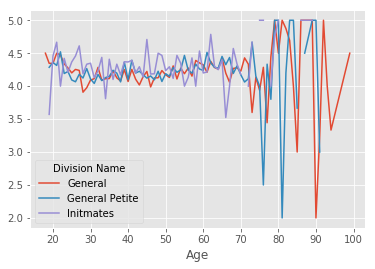

In [75]:
rating_aggrby_age_byDivision.plot.line()

# 關鍵欄位-相關係數分析

In [ ]:
# Y 與其他欄位間的相關係數
Corr_Matrix = df_train.corr()  # 計算相關係數
Corr = Corr_Matrix.loc['Y', :].sort_values()[:-1]
Corr = pd.DataFrame({'Y': Corr})
Corr

In [ ]:
# 計算Y欄位對於每個變項之間是與否的比例
l = df_data['Y']
col = 'X'
Y_Rate = df_data[l].groupby(by=col).mean().round(4).reset_index()
Y_Rate.columns = [col, 'Y Rate(%)']
Y_Rate['Y Rate(%)'] = Survival_Rate['Y Rate(%)'].map(lambda x:x*100)
display(Y_Rate)

# correlation heatmap


In [6]:
corrMatrix = df_train.corr()
print(corrMatrix)

                         Unnamed: 0  Clothing ID       Age    Rating  \
Unnamed: 0                 1.000000    -0.006072 -0.007749 -0.002568   
Clothing ID               -0.006072     1.000000  0.017972 -0.018879   
Age                       -0.007749     0.017972  1.000000  0.026831   
Rating                    -0.002568    -0.018879  0.026831  1.000000   
Recommended IND           -0.003887    -0.016206  0.030622  0.792336   
Positive Feedback Count   -0.002907     0.046356  0.043079 -0.064961   

                         Recommended IND  Positive Feedback Count  
Unnamed: 0                     -0.003887                -0.002907  
Clothing ID                    -0.016206                 0.046356  
Age                             0.030622                 0.043079  
Rating                          0.792336                -0.064961  
Recommended IND                 1.000000                -0.069045  
Positive Feedback Count        -0.069045                 1.000000  


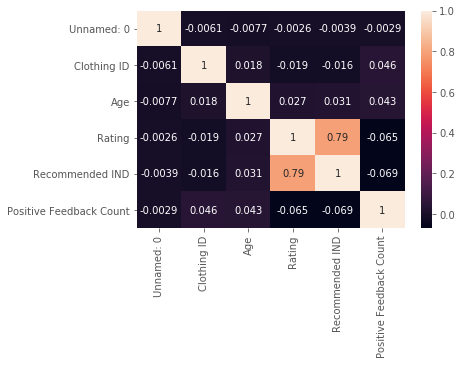

In [7]:
sns.heatmap(corrMatrix, annot=True)
plt.show()